In [1]:
##UTS INFORMATION RETRIEVAL
##Dwi Wahyu Effendi
##18081010017
import pandas as pd
import string
import collections
import nltk
import nltk.data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

In [3]:
#Membaca data txt dan memisahkan dengan tanda koma
df = pd.read_csv('Dataset/Reviews.txt', sep=',')
#Menghapus kolom index[0]
df.drop(df.columns[0],inplace=True, axis=1)
#Mencetak semua data
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
#Menghapus data review text yang null
for x in ["Review Text"]:
    df = df[df[x].notnull()]
#Mencetak hasil review text not null
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
#Memecah kolom review text saja
review = df['Review Text']
review

0     Absolutely wonderful - silky and sexy and comf...
1     Love this dress!  it's sooo pretty.  i happene...
2     I had such high hopes for this dress and reall...
3     I love, love, love this jumpsuit. it's fun, fl...
4     This shirt is very flattering to all due to th...
5     I love tracy reese dresses, but this one is no...
6     I aded this in my basket at hte last mintue to...
7     I ordered this in carbon for store pick up, an...
8     I love this dress. i usually get an xs but it ...
9     I'm 5"5' and 125 lbs. i ordered the s petite t...
10    Dress runs small esp where the zipper area run...
11    This dress is perfection! so pretty and flatte...
12    More and more i find myself reliant on the rev...
13    Bought the black xs to go under the larkspur m...
14    This is a nice choice for holiday gatherings. ...
15    I took these out of the package and wanted the...
16    Material and color is nice.  the leg opening i...
17    Took a chance on this blouse and so glad i

In [11]:
#Menghitung panjang data
panjangData = len(df)
#Melakukan proses tokenizing
for i in range(panjangData):
    data = review[i]
    var = nltk.word_tokenize(data)
    for i in var:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [87]:
#Proses Stop Word Removal
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

for a in range(panjangData):
    data = review[a]
    data = data.translate(str.maketrans('','',string.punctuation)).lower()
 
    tokens = nltk.word_tokenize(data)
    listStopword = set(stopwords.words('english'))

    removeWord = []
    for t in tokens:
        if t not in listStopword:
            data = removeWord.append(t)
##    print(removeWord) 
    for i in removeWord:
        print(i)
##        print(removeWord)
    print("\n")

absolutely
wonderful
silky
sexy
comfortable


love
dress
sooo
pretty
happened
find
store
im
glad
bc
never
would
ordered
online
bc
petite
bought
petite
58
love
length
hits
little
knee
would
definitely
true
midi
someone
truly
petite


high
hopes
dress
really
wanted
work
initially
ordered
petite
small
usual
size
found
outrageously
small
small
fact
could
zip
reordered
petite
medium
ok
overall
top
half
comfortable
fit
nicely
bottom
half
tight
layer
several
somewhat
cheap
net
layers
imo
major
design
flaw
net
layer
sewn
directly
zipper
c


love
love
love
jumpsuit
fun
flirty
fabulous
every
time
wear
get
nothing
great
compliments


shirt
flattering
due
adjustable
front
tie
perfect
length
wear
leggings
sleeveless
pairs
well
cardigan
love
shirt


love
tracy
reese
dresses
one
petite
5
feet
tall
usually
wear
0p
brand
dress
pretty
package
lot
dress
skirt
long
full
overwhelmed
small
frame
stranger
alterations
shortening
narrowing
skirt
would
take
away
embellishment
garment
love
color
idea
style
work


flattering
bad
picture
online
model
tucking
skirt
cant
see
ruching
across
front
little
dressier
alternative
plain
tee
reasonably
priced
retailer
58
generally
wear
6
small
fit
well
probably
back
black


bought
item
online
fit
model
looked
little
loose
got
mine
seemed
bit
tight
took
back
store
ordered
larger
size
sale
price
great
top


love
top
wear
time
problem
tell
wear
time
fabric
started
fade
id
still
recommend
comfortable


comfortable
material
good
cut
sleeves
flattering


sweater
perfect
fallits
roomy
warm
super
comfy
color
really
pops


really
cute
top
embroidery
collar
bib
top
beautiful
unique
received
lots
compliments
questions
got
im
rather
busty
top
medium
fit
well
small
probably
wouldve
fit
better
still
super
adorable


cute
top
transition
easily
summer
fall
fits
well
nice
print
comfortable
tried
store
purchase
color
washed
best
color
blonde
would
look
much
better
brunette
different
color
likely
would
purchased




In [88]:
#Proses Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

for a in range(panjangData):
    st = PorterStemmer()
    data = review[a]
    data = data.translate(str.maketrans('','',string.punctuation)).lower()
 
    tokens = nltk.word_tokenize(data)
    listStopword = set(stopwords.words('english'))

    stemWord = []
    for t in tokens:
        if t not in listStopword:
            data = stemWord.append(st.stem(t))
    print(stemWord) 
##    for i in stemWord:
##        print(i)
##        print(stemWord)
print("\n")

['absolut', 'wonder', 'silki', 'sexi', 'comfort']
['love', 'dress', 'sooo', 'pretti', 'happen', 'find', 'store', 'im', 'glad', 'bc', 'never', 'would', 'order', 'onlin', 'bc', 'petit', 'bought', 'petit', '58', 'love', 'length', 'hit', 'littl', 'knee', 'would', 'definit', 'true', 'midi', 'someon', 'truli', 'petit']
['high', 'hope', 'dress', 'realli', 'want', 'work', 'initi', 'order', 'petit', 'small', 'usual', 'size', 'found', 'outrag', 'small', 'small', 'fact', 'could', 'zip', 'reorder', 'petit', 'medium', 'ok', 'overal', 'top', 'half', 'comfort', 'fit', 'nice', 'bottom', 'half', 'tight', 'layer', 'sever', 'somewhat', 'cheap', 'net', 'layer', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directli', 'zipper', 'c']
['love', 'love', 'love', 'jumpsuit', 'fun', 'flirti', 'fabul', 'everi', 'time', 'wear', 'get', 'noth', 'great', 'compliment']
['shirt', 'flatter', 'due', 'adjust', 'front', 'tie', 'perfect', 'length', 'wear', 'leg', 'sleeveless', 'pair', 'well', 'cardigan', 'love',

['poncho', 'cute', 'love', 'plaid', 'check', 'design', 'color', 'look', 'like', 'sorbet', 'cream', 'pair', 'well', 'turtleneck', 'jean', 'pencil', 'skirt', 'heel', 'love', 'look', 'fall', 'roll', 'right', 'spring', 'great', 'buy']
['first', 'thermal', 'natur', 'didnt', 'expect', 'super', 'sheer', 'realli', 'sheer', 'light', 'fabric', 'like', 'prepar', 'consid', 'might', 'run', 'walk', 'around', 'hous', 'second', 'larg', 'order', 'size', '0', 'nice', 'overs', 'fit', '53', '125', 'pound', 'wouldnt', 'want', 'go', 'larger', 'along', 'sheer', 'fabric', 'easili', 'stretch', 'dont', 'mind', 'case', 'final', 'color', 'look', 'white', 'monitor', 'show', 'color', 'blue', 'dot']
['tri', 'today', 'local', 'retail', 'comfort', 'flatter', 'bad', 'pictur', 'onlin', 'model', 'tuck', 'skirt', 'cant', 'see', 'ruch', 'across', 'front', 'littl', 'dressier', 'altern', 'plain', 'tee', 'reason', 'price', 'retail', '58', 'gener', 'wear', '6', 'small', 'fit', 'well', 'probabl', 'back', 'black']
['bought', 'it

In [89]:
#Proses Stemming dan Menghitung Frekuensi Term
stemWord = []
for a in range(panjangData):
    st = PorterStemmer()
    data = review[a]
    data = data.translate(str.maketrans('','',string.punctuation)).lower()
 
    tokens = nltk.word_tokenize(data)
    listStopword = set(stopwords.words('english'))

    for t in tokens:
        if t not in listStopword:
            t = stemWord.append(st.stem(t))
            
kemunculan = nltk.FreqDist(stemWord)
var = kemunculan.most_common()
##    print(var) 
for i in var:
    print(i)
##        print(stemWord)

('dress', 26)
('look', 26)
('fit', 25)
('love', 23)
('color', 19)
('size', 17)
('top', 16)
('small', 15)
('would', 14)
('order', 13)
('wear', 13)
('skirt', 13)
('fabric', 13)
('petit', 12)
('like', 12)
('im', 11)
('littl', 11)
('nice', 11)
('well', 11)
('flatter', 10)
('go', 10)
('pretti', 9)
('realli', 9)
('great', 9)
('back', 9)
('length', 8)
('super', 8)
('cute', 8)
('comfort', 7)
('work', 7)
('usual', 7)
('could', 7)
('tight', 7)
('perfect', 7)
('pair', 7)
('long', 7)
('tri', 7)
('pant', 7)
('run', 7)
('feel', 7)
('still', 7)
('much', 7)
('store', 6)
('bought', 6)
('medium', 6)
('shirt', 6)
('front', 6)
('bit', 6)
('materi', 6)
('beauti', 6)
('fall', 6)
('good', 6)
('jean', 6)
('need', 6)
('definit', 5)
('layer', 5)
('cheap', 5)
('zipper', 5)
('get', 5)
('leg', 5)
('style', 5)
('hte', 5)
('xs', 5)
('sleev', 5)
('retail', 5)
('make', 5)
('wasnt', 5)
('underneath', 5)
('even', 5)
('made', 5)
('qualiti', 5)
('waist', 5)
('wouldnt', 5)
('larg', 5)
('coat', 5)
('price', 5)
('find', 4)
(

x = 0
y = 1
A = 1
print("NO","\t","|","TERM","   ","\t\t","|","FREKUENSI","\t","|")
print("--------------------------------------------------")
for x in range(50):
    print(A,"\t","|",var[x][0],"   ","\t\t","|",var[x][1],"\t\t","|")
    A+=1

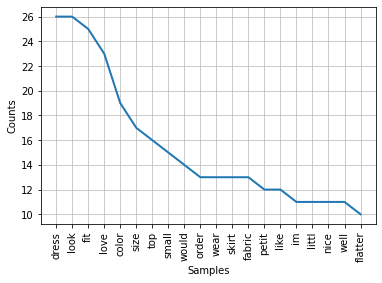

In [92]:
kemunculan.plot(20,cumulative=False)
plt.show()